## Data Challenge #2

**Author:** Leonardo Espin

**Date:** February 26, 2018

In [1]:
#loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

* First I will load the data and make the necessary adjustments and convertions to it, in order to produce the relevant plots

In [2]:
#loading the relevant data
rawEvents = pd.read_csv('yammer_events.csv')
print(rawEvents.shape)
rawEvents.head()

(340832, 7)


,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


In [3]:
#convert to datetime data types
rawEvents['occurred_at']=rawEvents['occurred_at'].astype('M')
rawEvents.dtypes

user_id               float64
occurred_at    datetime64[ns]
event_type             object
event_name             object
location               object
device                 object
user_type             float64
dtype: object

* Below I define a function that allows me to group events by week, setting Mondays as the start of a week
* Afterwards I add a column to the dataframe with the week where an event took place

In [4]:
def getWeek(date):
    '''get week starting on mondays'''
    n=int(np.floor((date
                    -pd.Timestamp('2012-12-31'))/pd.Timedelta('7 day')))
    return (n*pd.Timedelta('7 day') +pd.Timestamp('2012-12-31'))

In [5]:
rawEvents['week']=rawEvents['occurred_at'].apply(lambda x:getWeek(x))
#check that calculations are correct with a small sample
rawEvents.tail()

,user_id,occurred_at,event_type,event_name,location,device,user_type,week
340827,18815.0,2014-08-31 13:41:46,engagement,like_message,Ireland,dell inspiron notebook,2.0,2014-08-25
340828,18815.0,2014-08-31 13:42:11,engagement,home_page,Ireland,dell inspiron notebook,2.0,2014-08-25
340829,18815.0,2014-08-31 13:42:43,engagement,send_message,Ireland,dell inspiron notebook,2.0,2014-08-25
340830,18815.0,2014-08-31 13:43:07,engagement,home_page,Ireland,dell inspiron notebook,2.0,2014-08-25
340831,18815.0,2014-08-31 13:43:42,engagement,like_message,Ireland,dell inspiron notebook,2.0,2014-08-25


* The plot below is a reproduction of the plot presented in the challenge:

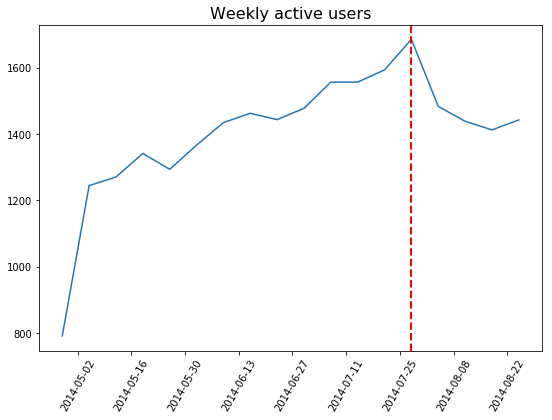

In [6]:
plt.figure(figsize=(9,6))
plt.plot(rawEvents.groupby(['week'])['user_id']
         .unique().apply(lambda x:len(x)))
plt.title('Weekly active users', fontsize=16);
plt.axvline(pd.to_datetime('2014-07-28'), color='r', linestyle='--', lw=2)
plt.xticks(rotation=60);

* The drop in weekly users coincides with the beggining of the last moth of the summer, when many people in the norther hemisphere go to vacation. 
* To confirm that this is the most likely explanation of the drop in users, I present two plots below. The firs one shows the daily active users in the United States, around **the weekend of the 4th of July**:

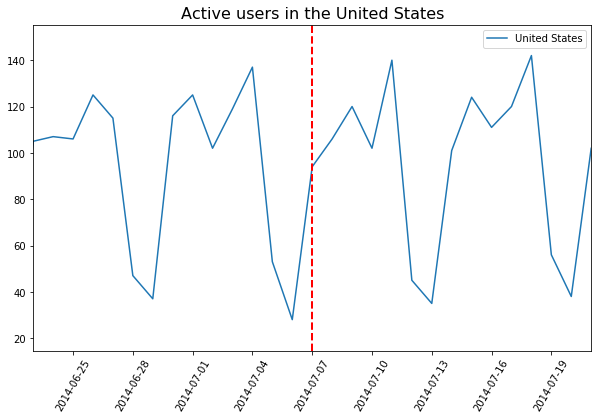

In [7]:
#need to group events by day for the next plot
rawEvents['day']=rawEvents['occurred_at'].dt.date
plt.figure(figsize=(10,6))
plt.plot(rawEvents[rawEvents['location']=='United States'].groupby(['day'])['user_id'].unique().apply(lambda x:len(x)),
             label='United States');
plt.axvline(pd.to_datetime('2014-07-07'), color='r', linestyle='--', lw=2)
plt.title('Active users in the United States', fontsize=16);
plt.xlim(pd.to_datetime('2014-06-23'),pd.to_datetime('2014-07-21'))
plt.xticks(rotation=60)
plt.legend();

* Note that there is a drop in user engagement at the start of the week immediately after the 4th of July weekend of 2014, which was a Friday
* Note also that there is a marked slower rate of user engament during the days after that weekend, compared with the weeks before and after the holiday. 
* This shows that Holidays have a measurable effect on user engagement

Below I create a plot which groups users according to world regions, in order to test the two-hemisphere hypothesis

In [8]:
#need to define regions of the world to group according to region
regions_map = { 'North America' : ['United States', 'Canada', 'Mexico'], 
               'Asia' : ['Japan', 'India', 'Thailand', 'Taiwan', 'Indonesia', 'Singapore', 'Hong Kong', 'Philippines', 'Malaysia'], 
               'South America' : ['Brazil', 'Colombia', 'Korea', 'Venezuela', 'Chile', 'Argentina'], 
               'Europe' : ['Netherlands', 'Austria', 'Finland', 'United Kingdom', 'France', 'Germany', 'Russia', 'Spain', 'Greece', 'Norway', 'Belgium', 'Poland', 'Sweden', 'Denmark', 'Italy', 'Portugal', 'Switzerland', 'Ireland'], 
               'Middle East' : ['Iran', 'Israel', 'Iraq', 'United Arab Emirates', 'Saudi Arabia', 'Pakistan', 'Turkey'], 
               'Africa' : ['Nigeria', 'Egypt', 'South Africa'], 'Australia' : ['Australia'] }
def getRegion(country):
    for key,value in regions_map.items():
        if country in value:
            return key

In [9]:
#defining a region column for the dataset
rawEvents['region']=rawEvents['location'].apply(lambda x:getRegion(x))

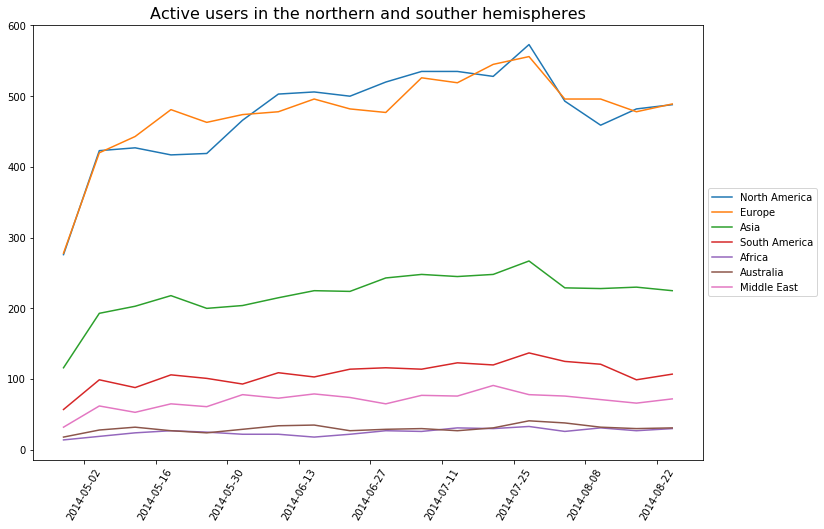

In [10]:
plt.figure(figsize=(12,8))
plt.plot(rawEvents[rawEvents['region']=='North America'].groupby(['week'])['user_id'].unique().apply(lambda x:len(x)),
             label='North America');
plt.plot(rawEvents[rawEvents['region']=='Europe'].groupby(['week'])['user_id'].unique().apply(lambda x:len(x)),
             label='Europe');
plt.plot(rawEvents[rawEvents['region']=='Asia'].groupby(['week'])['user_id'].unique().apply(lambda x:len(x)),
             label='Asia');
plt.plot(rawEvents[rawEvents['region']=='South America'].groupby(['week'])['user_id'].unique().apply(lambda x:len(x)),
             label='South America');
plt.plot(rawEvents[rawEvents['region']=='Africa'].groupby(['week'])['user_id'].unique().apply(lambda x:len(x)),
             label='Africa');
plt.plot(rawEvents[rawEvents['region']=='Australia'].groupby(['week'])['user_id'].unique().apply(lambda x:len(x)),
             label='Australia');
plt.plot(rawEvents[rawEvents['region']=='Middle East'].groupby(['week'])['user_id'].unique().apply(lambda x:len(x)),
             label='Middle East');
plt.title('Active users in the northern and souther hemispheres', fontsize=16);
plt.xticks(rotation=60)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

* The plot above shows the weekly user engament in several regions of the world. As seen in the plot while there are big drops in user interaction for North American and European users, there is little variation in comparison for people in the souther hemispheres and Middle East, pointing to summer vacations in the northern hemisphere as the most likely explation for the drop seen in the aggregate user count seen in the first plot.
* As a final note, the email click-through activity shows the same trends as the ones identified above